# Introduction 
Pens and Printers has been a reliable provider of premium office products to large organizations, offering a diverse range from pens and notebooks to desk chairs and monitors. While we don't manufacture our own goods, our commitment to quality has fostered enduring customer trust. As consumer buying patterns evolve in the digital age, we recognize the necessity of adapting our sales strategies, particularly in the context of launching new product lines. In response to the changing landscape, we recently introduced a line of office stationery, emphasizing the continued demand for analog tools such as notebooks, pens, and sticky notes. Our sales focus centers on empowering customers to enhance creativity and productivity, with ongoing testing of targeted email, phone calls, and a combination of both to swiftly discern the most effective approaches.

Over the past six weeks, our efforts have been concentrated on refining sales strategies for the new office stationery line. Through a strategic mix of targeted email campaigns, phone outreach, and a hybrid approach, we are committed to swiftly learning and implementing the most effective techniques to ensure the successful promotion and sale of our latest product offerings.

# Data Preprocessing and Validation
The original dataset comprises 15,000 rows and 8 columns before undergoing cleaning and validation. After dropping the missing values from the revenue column, there are 13,926 rows left. The validation process involved assessing each column against specific criteria outlined in the dataset table.

- Week:
6 unique values, ranging from 1 to 6.
No cleaning is required.

- Sales Method:
3 unique methods: Call, Email, and Email+Call.
Corrections made for inconsistent entries (e.g., "em + call" to "Email+Call" and "email" to "Email").

- Customer ID:
Character variable without missing values.
No cleaning is needed.

- Number of Sold Items (nb_sold):
10 numeric categories without missing values, ranging from 7 to 16.
No cleaning is needed.

- Revenue:
Numeric values with 1,074 missing values.
The missing values are removed from the dataset.

- Years as Customer:
Numeric values, with two identified outliers (47 and 63 years as a customer).
Considering the store's existence since 1984 (39 years), further investigation and infurmation may be needed to address these outliers.

- Number of Site Visits (nb_site_visits):
Numeric values without missing values.
No cleaning is needed.

- State:
50 possible values without missing values.
No cleaning is needed.

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
import pandas as pd
df = pd.read_csv("product_sales.csv")
print(df.shape)
df.head()

(15000, 8)


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


## Categorical Variable: Sale_method
There are 3 unique methods including Call, Email and Email+Call, with 23 values like as “em + call” and 10 values like as “email” were corrected.

In [155]:
df['sales_method'] = df['sales_method'].astype('category')
print(df["sales_method"].value_counts())
df['sales_method'] = df['sales_method'].replace("em + call", "Email + Call")
df['sales_method'] = df['sales_method'].replace("email", "Email")
print(df["sales_method"].value_counts())

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64
Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64


## Categorical Variable: State
There is no misspellings in the state columns. No cleaning is required.

In [156]:
df['state'] = df['state'].astype('category');
print(df.state.value_counts())

California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Louisiana          230
Colorado           230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode Islan

## Missing Values 
The observations with missing values in rvenue column are dropped.

In [157]:
# Handling missing values
print(df.isna().sum().sort_values())

week                    0
sales_method            0
customer_id             0
nb_sold                 0
years_as_customer       0
nb_site_visits          0
state                   0
revenue              1074
dtype: int64


In [158]:
# Count the occurrences of each sales method
counts_method = df['sales_method'].value_counts(dropna=False)

# Count the null values in the 'revenue' column for each sales method
na_revenue = df.groupby('sales_method')['revenue'].count().reindex(counts_method.index)

# Create a DataFrame to display counts, null values, and the percentage of nulls for each sales method
na_counts = pd.concat([counts_method, na_revenue], axis=1).rename(columns={'sales_method': 'Method Count', 'revenue': 'Null Values Count'})
na_counts['NaNs'] = na_counts['Method Count'] - na_counts['Null Values Count']
na_counts['NaNs_pct'] = round(na_counts['NaNs'] / na_counts['Method Count'], 2)

# Display the final DataFrame
na_counts

,Method Count,Null Values Count,NaNs,NaNs_pct
Email,7466,6922,544,0.07
Call,4962,4781,181,0.04
Email + Call,2572,2223,349,0.14


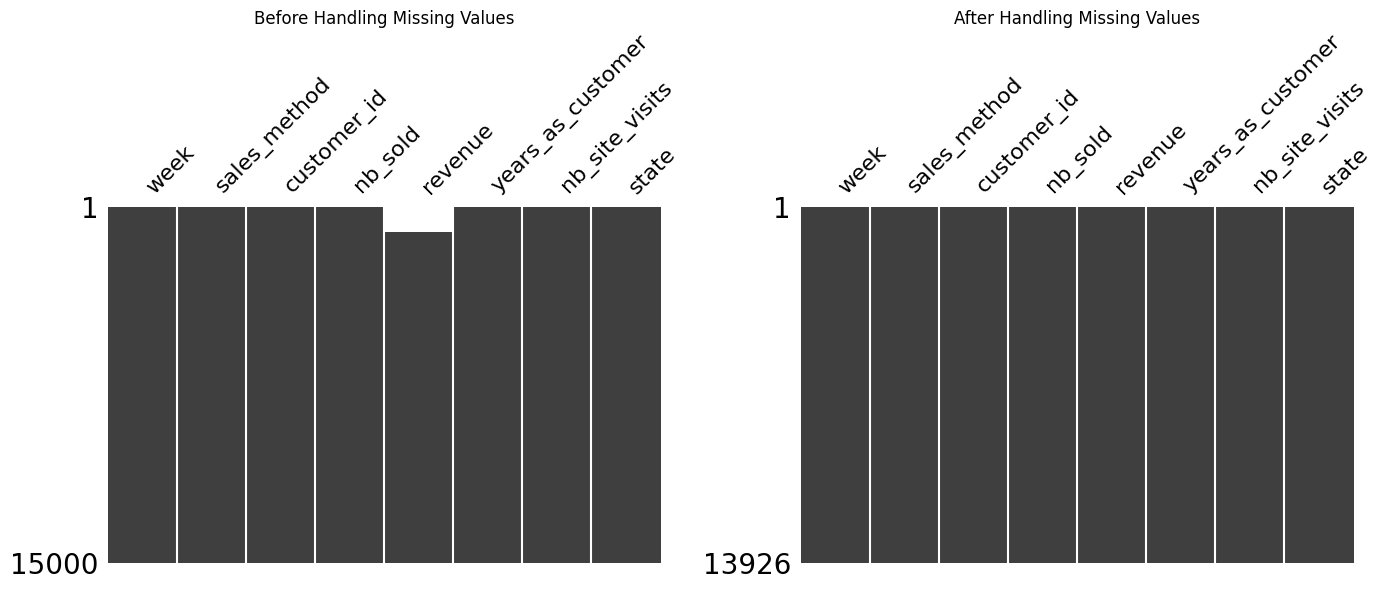

In [159]:
import missingno as msno

# Create a copy of the original data
df_orig = df.copy()

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting missing values before handling
msno.matrix(df_orig, ax=axes[0], sort="ascending", sparkline=False)
axes[0].set_title("Before Handling Missing Values")

# Drop rows with missing values in specified columns
df = df.dropna(subset=['revenue'])

# Plotting missing values after handling
msno.matrix(df, ax=axes[1], sort="ascending", sparkline=False)
axes[1].set_title("After Handling Missing Values")

plt.tight_layout()
plt.show()

# Exploratory Analysis and Visualization

In [160]:
# Descriptions of Data
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,13926.000000,13926.000000,13926.000000,13926.000000,13926.000000
mean,3.078271,10.040069,93.934943,4.978960,24.947006
std,1.650650,1.789690,47.435312,5.047828,3.491491
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,1.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,4.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,37.000000


## Question 1: How many customers were there for each approach?
- Total Customers: 13,926 (15,000 with null values)
- Call: 4,781 (4,962)
- Email: 6,922 (7,466)
- Email + Call: 2,223 (2,572)

There were more sales via email, totaling 6,922 (7,466), making it the most used method. Call comes in second with 4,781 (4,962) customers, while Email + Call is the least utilized with 2,223 (2,572) counts.

In [161]:
# Observations of each sales method
df.sales_method.value_counts()

Email           6922
Call            4781
Email + Call    2223
Name: sales_method, dtype: int64

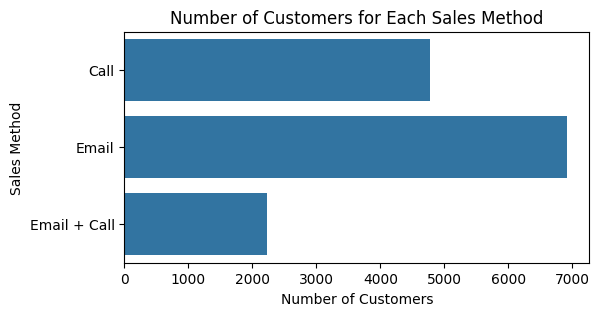

In [162]:
# Plotting the number of customers for each approach
plt.figure(figsize=(6, 3))
sns.countplot(y='sales_method', data=df)
plt.title('Number of Customers for Each Sales Method')
plt.ylabel('Sales Method')
plt.xlabel('Number of Customers')
plt.show()

## Customer Relation and Number of product sold
Examining the distribution of customers based on their years as customers reveals a concentration of customer relationships within the first 5 years, showcasing a normal distribution with positive skewness. Interestingly, there is a noteworthy segment of customers who have remained loyal for an extended period, ranging between 6 and 20 years. It's crucial to highlight two outliers, with customers claiming to be customers for 47 and 63 years, which is not aligned with the store's existence since 1984, spanning 39 years.

Shifting focus to the distribution of the number of products sold per purchase, a notable trend emerges. The majority of purchases exhibit a preference for acquiring 9 and 10 products. Over 3500 customers engaged in transactions involving 9 or 10 products. The distribution of products sold per purchase displays an approximate normal distribution with positive skewness, reflecting a common purchasing pattern. This insight underscores the significance of understanding customer preferences, offering valuable insights for targeted marketing strategies and customer relationship management.


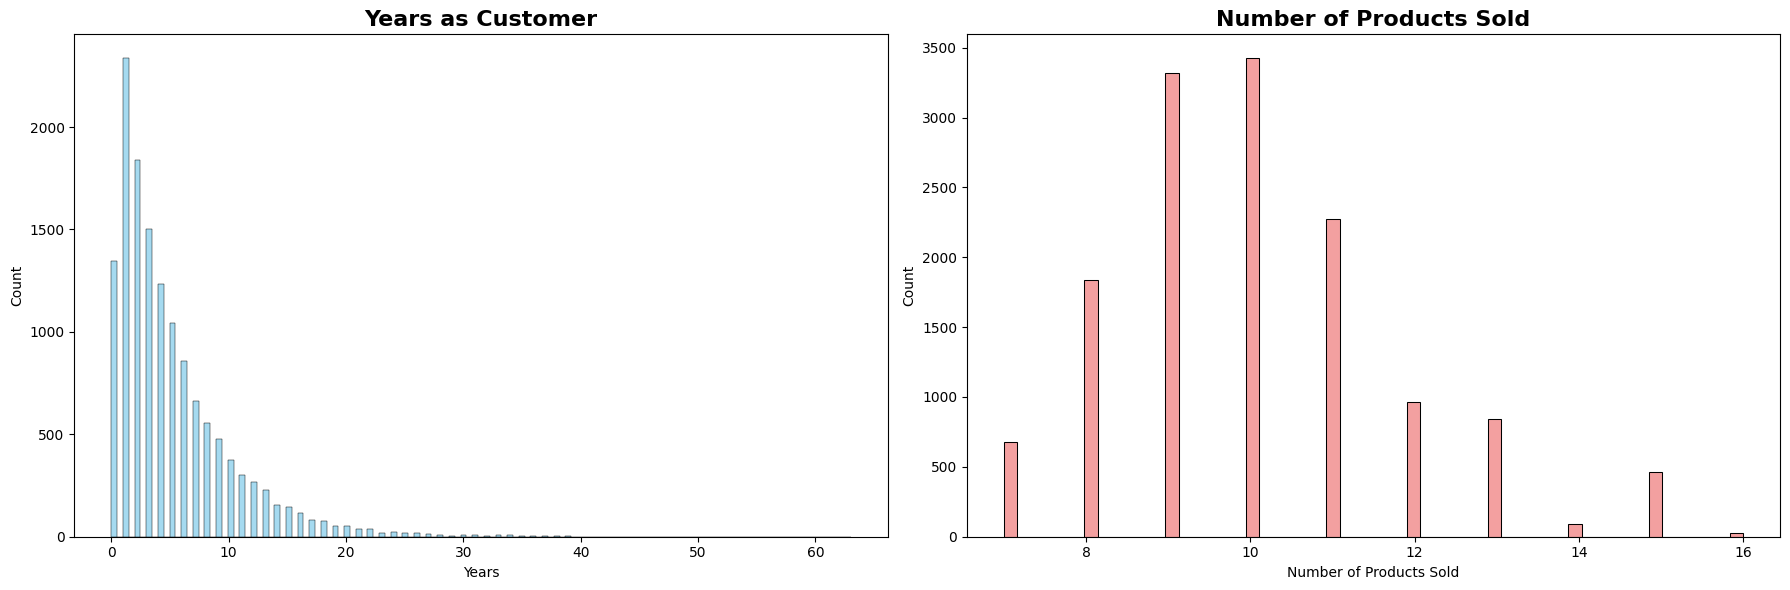

In [163]:
# Set up a 1x3 grid for side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Histogram for Years as Customer
sns.histplot(data=df, x="years_as_customer", color="skyblue", ax=axes[0])
axes[0].set_title('Years as Customer', fontdict={'size': 16, 'weight': 'bold'})
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Count')

# Histogram for Number of Products Sold
sns.histplot(data=df, x="nb_sold", color="lightcoral", ax=axes[1])
axes[1].set_title('Number of Products Sold', fontdict={'size': 16, 'weight': 'bold'})
axes[1].set_xlabel('Number of Products Sold')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

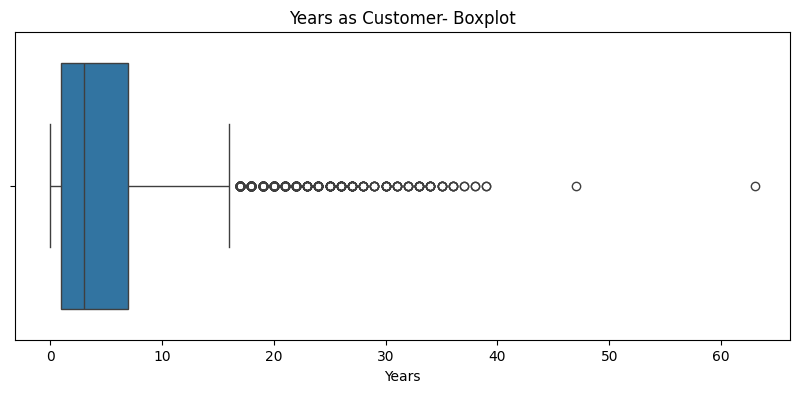

In [164]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='years_as_customer', data=df)
plt.title('Years as Customer- Boxplot')
plt.xlabel('Years')
plt.show()

## Website visits
From the figure, we can see that there is a positive correlation between website visits and products sold. The more visits results in more products sold.

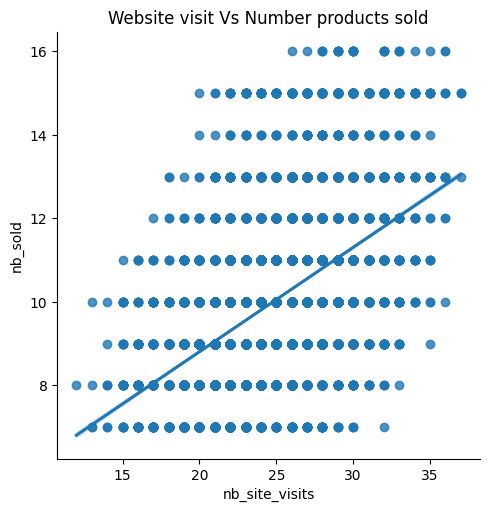

In [165]:
# plot a scatter plot with regression line for website visits and products sold
sns.lmplot(data=df, x='nb_site_visits', y='nb_sold')
plt.title('Website visit Vs Number products sold')
plt.show()

## Question 2: What does the spread of the revenue look like overall? And for each method?
While the Email + Call method boasts the highest average revenue, making it a lucrative choice. It is essential to note that the Email method is used the most, resulting in a higher cumulative revenue compared to other methods. Therefore, the company may consider leveraging the cost-effective nature of the Email method for broader outreach, while also strategically incorporating the Email + Call method to maximize per-sale revenue. Call is the least performing method, likely due to its higher implementation cost.

Overall, the revenue spread is not a normal distribution. It is rightly skewed distribution. Moreover, the probability of getting a sale with smaller revenue is far greater than a sale with a larger revenue.

- Call: Smallest spread and median.
- Email: Second smallest spread and median.
- Email + Call: Largest spread and median.

In [166]:
# Average revenue of each sales method
df.groupby('sales_method')['revenue'].mean().to_frame()

,revenue
sales_method,
Call,47.597467
Email,97.127684
Email + Call,183.651233


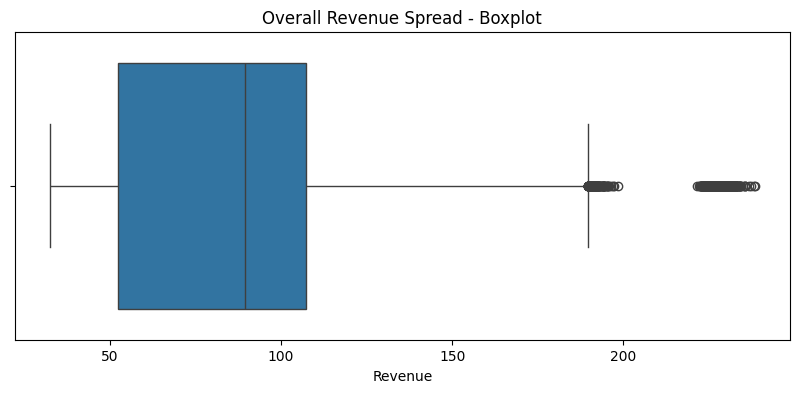

In [167]:
# Overall Revenue Spread - Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x='revenue', data=df)
plt.title('Overall Revenue Spread - Boxplot')
plt.xlabel('Revenue')
plt.show()

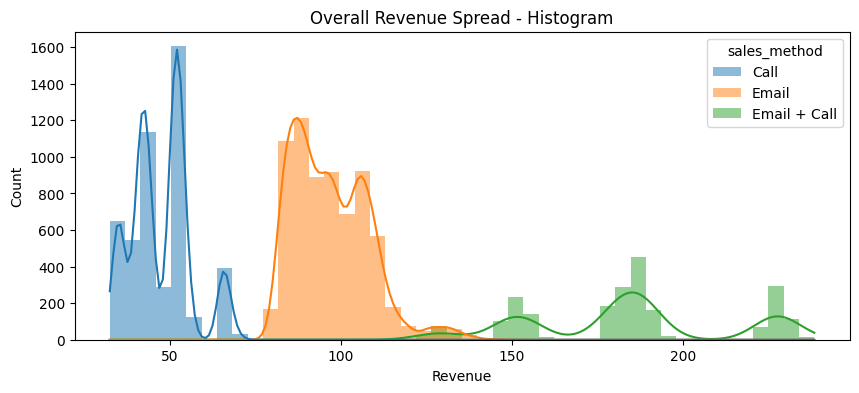

In [168]:
# Overall Revenue Spread - Histogram
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='revenue', hue='sales_method', 
                 fill=True, common_norm=True, palette="tab10", alpha=.5, linewidth=0, kde=True)
plt.title('Overall Revenue Spread - Histogram')
plt.xlabel('Revenue')
plt.show()

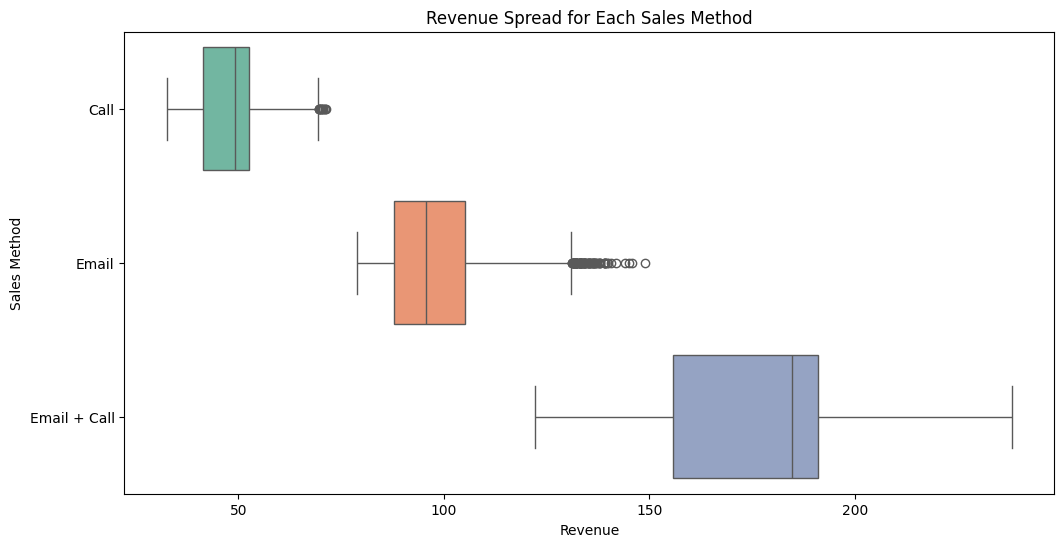

In [169]:
# Set a color palette for better visibility
palette = sns.color_palette("Set2")

# Create a horizontal boxplot with improved colors and labels
plt.figure(figsize=(12, 6))
sns.boxplot(x='revenue', y='sales_method', data=df, palette=palette, orient='h')
plt.title('Revenue Spread for Each Sales Method')
plt.xlabel('Revenue')
plt.ylabel('Sales Method')
plt.show()

## Question 3: Was there any difference in revenue over time for each of the methods?
From the graphs, we can observe that the revenue from the sales increase each additional week although the sales were higher in first week and lowest in sixth week. The Email + Call sale method is notably getting larger revenue each week. 

Call Method:
Demonstrates the smallest increase, with average revenue starting at 35 dollars in week 1 and growing to 66 dollars by week 6, reflecting a modest 31 dollars increment.

Email Method:
Exhibits the second smallest increase, beginning with an average revenue of 87 dollars in week 1 and reaching 130 dollars by week 6, indicating a 43 dollars upsurge over the period.

Email + Call Method:
Displays the most substantial increase, boasting average revenues of 128 dollars in week 1, surging impressively to 227 dollars by week 6. This marks a remarkable 99 dollars increase over the six-week span, showcasing the method's robust revenue growth.

Text(0, 0.5, 'Weeks')

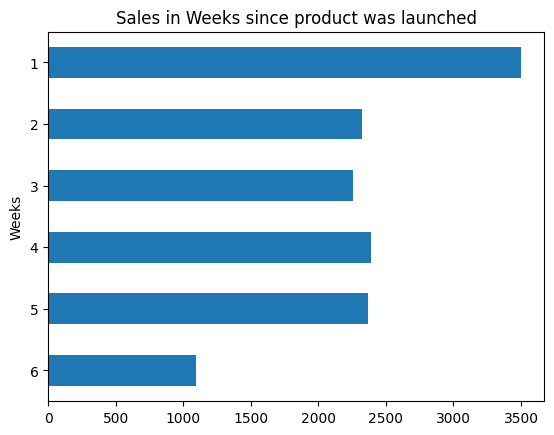

In [170]:
# plot count of weeks since product was launched
ax = df.week.value_counts().reindex([1,2,3,4,5,6])[::-1].plot.barh()
ax.set_title('Sales in Weeks since product was launched')
ax.set_ylabel('Weeks')

In [171]:
# Mean of the method's revenue per week 
df.groupby(['week', 'sales_method'])['revenue'].agg(['mean', 'median']).unstack().style.background_gradient()

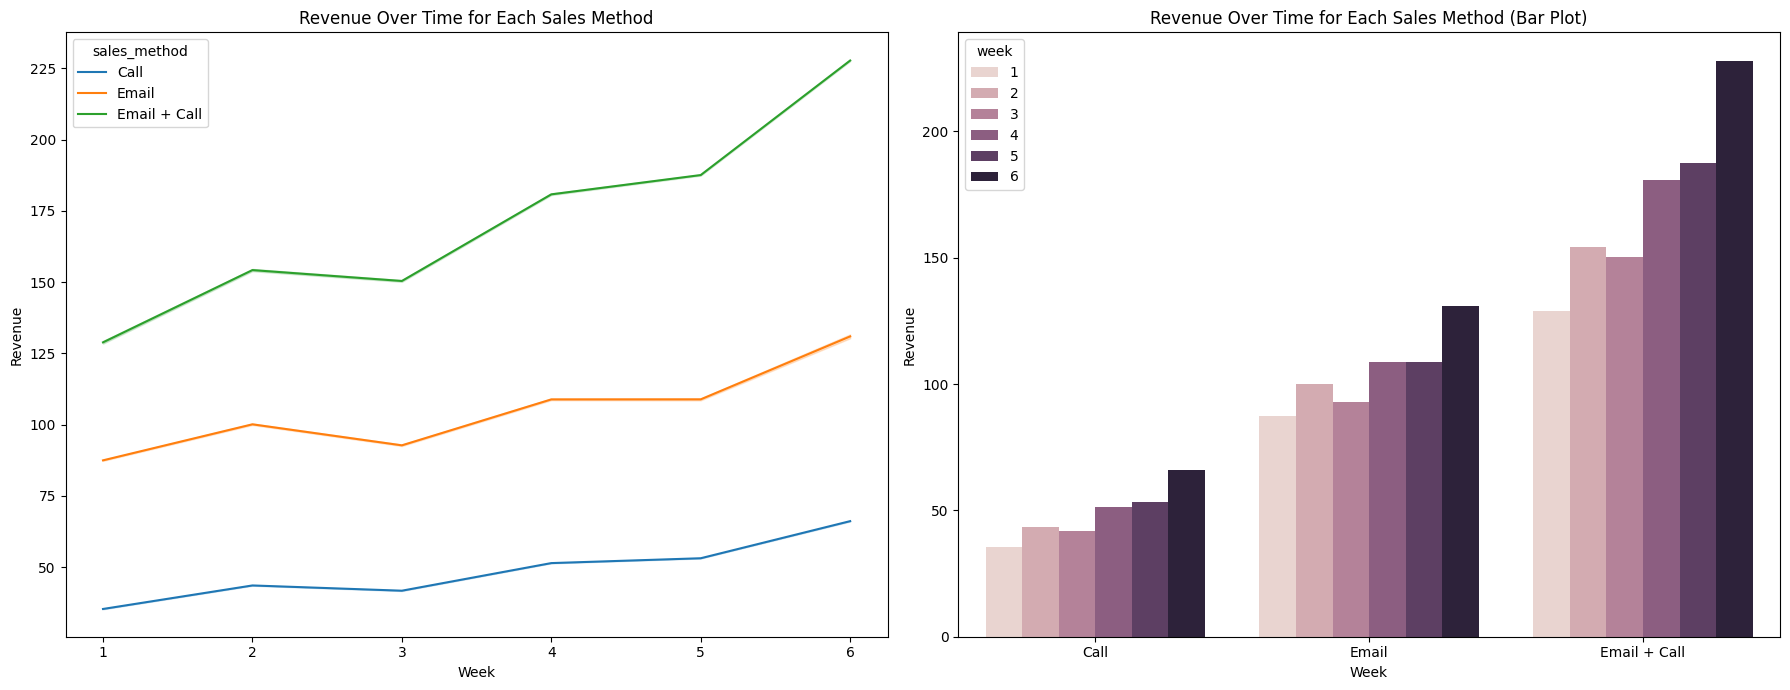

In [172]:
# Line plot for revenue over time for each method
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 1x2 grid for side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Line plot for revenue over time for each method
sns.lineplot(x='week', y='revenue', hue='sales_method', data=df, ax=axes[0])
axes[0].set_title('Revenue Over Time for Each Sales Method')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Revenue')

# Bar plot for revenue over time for each method
sns.barplot(data=df, x="sales_method", y="revenue", hue="week", ci=None, ax=axes[1])
axes[1].set_title('Revenue Over Time for Each Sales Method (Bar Plot)')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Revenue')

# Adjust layout
plt.tight_layout()
plt.show()

# Business Metrics

The company's primary objective is to maximize revenue, and I recommend utilizing the average revenue metric for assessing sales performance. In this context, the **Email + Call** method emerges as the most profitable, boasting the highest average revenue at \$183. In contrast, **Email** records an average of \$97, while **Call** lags further behind with an average of \$47. To evaluate success, the sales team should employ the **Email + Call** method's \$183 average as a benchmark, allowing them to distinguish sales that surpass this baseline as more profitable and those falling below as less profitable.

It is essential to note that average revenue values may vary between overall and weekly assessments, given the consistent increase in weekly averages. Therefore, particularly in the initial weeks, it is plausible to encounter lower average revenue amounts than the overall \$183 benchmark. The sales team should be mindful of this nuance, recognizing the evolving nature of weekly averages and adjusting expectations accordingly. This nuanced approach ensures a more accurate evaluation of sales performance against the chosen baseline.



# Recommendations
- Sales Method:
Continue using Email + Call method as it consistently captured the most revenue and demonstrates substantial potential for further growth over time.

- Performance Metric:
Utilize the average revenue amount of the preferred sales method as the key metric as a primary metric for monitoring strong and increasing sales revenues.

- Sales Method Diversity:
Given the cost-effective implementation of Email method, consider retaining the Email method to diversify sales approaches.

- Sales Method Optimization:
Discontinue the use of the only Call method due to its resource-intensive nature (30 minutes per customer) and its consistently lower revenue amounts.

- Data Quality Improvement:
Investigate and rectify the issue causing the 1,074 missing values in the revenue column. This involves improving data collection processes to ensure comprehensive and accurate information.
These recommendations aim to streamline sales methods, focus on revenue-centric metrics, and enhance data quality to provide more robust insights for strategic decision-making.

-  Website traffic: 
Investment in Marketing startegies to increase the website traffic. The marketing traffic can help to increase the average revenue.